In [6]:
import actions.video_actions
import ipywidgets as widgets
from IPython.display import display
from actions.video_actions import ImageWidget
from actions.video_actions import BaseAction
from actions.video_actions import CropAction
from actions.video_actions import CropWidget
from actions.video_actions import ResizeAction
from actions.video_actions import ResizeWidget
from actions.video_actions import LiveVideoSources
from actions.video_actions import LiveVideoSourcesWidget
from actions.video_actions import VideoAction

In [29]:
_imageWidget = ImageWidget(display=False)
_crop = CropWidget(vstreams=[], imageWidget=_imageWidget)
_videoSources = LiveVideoSourcesWidget(child=_crop)
_resize = resizeWidget = ResizeWidget(action=ResizeAction(),parent=_crop,imageWidget=_imageWidget)

tab  = widgets.Tab(children = [_videoSources.vbox, _crop.vbox, _resize.vbox])
tab.set_title(0, 'videos')
tab.set_title(1, 'crop')
tab.set_title(2, 'resize')
display(tab)
_imageWidget.display()

Image(value=b'', format='PNG')

{'class': 'ResizeAction',
 'parameters': {'size': (128, 128),
  'use_w': False,
  'use_h': False,
  'algorithm': 0}}

# Build, execute pipeline

In [12]:
_action_dict_list = [_crop.action.toNormalized().dict(), _resize.action.dict()]

In [18]:
def createActionOfDict(adict):
    return eval(adict['class'])(**adict['parameters'])

def evaluateActionDictList(_action_dict_list, _img):
    for action_dict in _action_dict_list:
        action = createActionOfDict(action_dict)
        _img = action.evaluate(_img)['image']
    return _img
  
def saveActionDictList(filename='actions.json', actions=None):
        #print(videos)
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(actions, f, ensure_ascii=False, indent=4)    

def loadActionDictList(filename='actions.json'):
        with open(filename, 'r') as fp:
            file = json.load(fp)  
            return file            
            
#evaluateActionDictList(_action_dict_list,imgs[1])    
#saveActionDictList()  
#_action_dict_list = loadActionDictList()

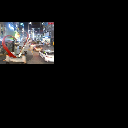

In [22]:
evaluateActionDictList(_action_dict_list,_crop.vstreams[0])
#_crop.vstreams[0]